In [1]:
import tensorflow
from tensorflow import keras

In [2]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
 num_words=10000)

In [3]:
word_index = reuters.get_word_index()
reverse_word_index = dict(
 [(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join(
 [reverse_word_index.get(i - 3, "?") for i in train_data[0]]) 

In [4]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [5]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [6]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [7]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [8]:
from tensorflow.keras import layers
model = keras.Sequential([
 layers.Dense(64, activation="relu"),
 layers.Dense(64, activation="relu"),
 layers.Dense(46, activation="softmax")
])

In [9]:
model.compile(optimizer="rmsprop",
 loss="categorical_crossentropy",
 metrics=["accuracy"])


In [10]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [11]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 40ms/step - loss: 2.8111 - accuracy: 0.4922 - val_loss: 1.8628 - val_accuracy: 0.6080
Epoch 2/20
16/16 [==============================] - 0s 24ms/step - loss: 1.5789 - accuracy: 0.6710 - val_loss: 1.3975 - val_accuracy: 0.6900
Epoch 3/20
16/16 [==============================] - 0s 23ms/step - loss: 1.2067 - accuracy: 0.7382 - val_loss: 1.1913 - val_accuracy: 0.7410
Epoch 4/20
16/16 [==============================] - 0s 23ms/step - loss: 0.9802 - accuracy: 0.7915 - val_loss: 1.0776 - val_accuracy: 0.7740
Epoch 5/20
16/16 [==============================] - 0s 23ms/step - loss: 0.8117 - accuracy: 0.8244 - val_loss: 1.0130 - val_accuracy: 0.7750
Epoch 6/20
16/16 [==============================] - 0s 23ms/step - loss: 0.6770 - accuracy: 0.8547 - val_loss: 0.9366 - val_accuracy: 0.8060
Epoch 7/20
16/16 [==============================] - 0s 27ms/step - loss: 0.5617 - accuracy: 0.8814 - val_loss: 0.9092 - val_accuracy: 0.8100
Epoch 8/20
16

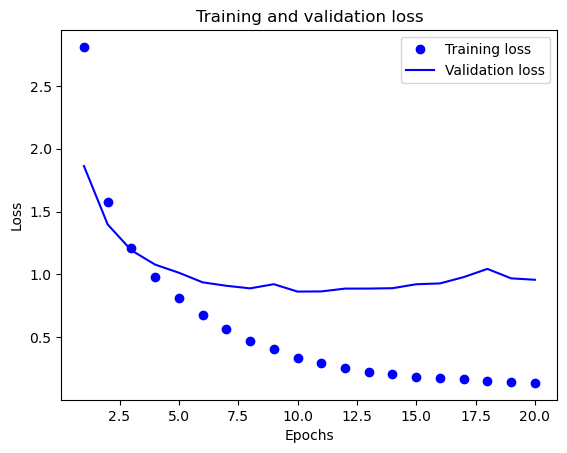

In [12]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

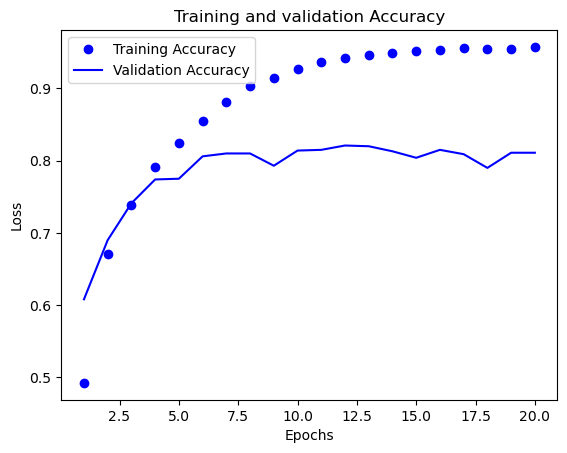

In [13]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
acc=history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training Accuracy")
plt.plot(epochs, val_acc, "b", label="Validation Accuracy")
plt.title("Training and validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [14]:
model = keras.Sequential([
 layers.Dense(64, activation="relu"),
 layers.Dense(64, activation="relu"),
 layers.Dense(46, activation="softmax")
])

In [15]:
model.compile(optimizer="rmsprop",
 loss="categorical_crossentropy",
 metrics=["accuracy"])

In [16]:
model.fit(x_train,
 y_train,
 epochs=9,
 batch_size=512)

Epoch 1/9
18/18 [==============================] - 1s 22ms/step - loss: 2.6018 - accuracy: 0.5147
Epoch 2/9
18/18 [==============================] - 0s 20ms/step - loss: 1.4598 - accuracy: 0.6886
Epoch 3/9
18/18 [==============================] - 0s 22ms/step - loss: 1.1234 - accuracy: 0.7519
Epoch 4/9
18/18 [==============================] - 0s 24ms/step - loss: 0.9139 - accuracy: 0.7995
Epoch 5/9
18/18 [==============================] - 0s 21ms/step - loss: 0.7568 - accuracy: 0.8326
Epoch 6/9
18/18 [==============================] - 0s 21ms/step - loss: 0.6226 - accuracy: 0.8677
Epoch 7/9
18/18 [==============================] - 0s 22ms/step - loss: 0.5214 - accuracy: 0.8891
Epoch 8/9
18/18 [==============================] - 0s 20ms/step - loss: 0.4269 - accuracy: 0.9116
Epoch 9/9
18/18 [==============================] - 0s 19ms/step - loss: 0.3653 - accuracy: 0.9215


In [17]:
results = model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 2ms/step - loss: 0.8898 - accuracy: 0.7965
